# Data Mining
## Apostolopoulou Alexandra (1115201700005)
## Project 3η

In [ ]:
import pandas as pd
import string
import os
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import time
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import folium
from itertools import cycle, islice
from pandas import options
import warnings
import tables
import pickle

First, we load and save train.csv and test.csv files.

In [ ]:
path = '/home/alexa/Documents/Data_Mining/ERGASIA_3/data/train.csv'

train_df = pd.read_csv(path)

train_df

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...
3942,1,20120502172717Z,"""you are both morons and that is never happening"""
3943,0,20120528164814Z,"""Many toolbars include spell check, like Yahoo..."
3944,0,20120620142813Z,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,20120528205648Z,"""How about Felix? He is sure turning into one ..."


In [ ]:
path = '/home/alexa/Documents/Data_Mining/ERGASIA_3/data/impermium_verification_labels.csv'

test_df = pd.read_csv(path)

test_df

,id,Insult,Date,Comment,Usage
0,1,0,20120603163526Z,"""like this if you are a tribe fan""",PrivateTest
1,2,1,20120531215447Z,"""you're idiot.......................""",PrivateTest
2,3,1,20120823164228Z,"""I am a woman Babs, and the only ""war on women...",PrivateTest
3,4,1,20120826010752Z,"""WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...",PrivateTest
4,5,1,20120602223825Z,"""haha green me red you now loser whos winning ...",PrivateTest
...,...,...,...,...,...
2230,2231,0,20120528100303Z,"""FUCKIN LAME COME ON WTF STOP FUCKING OVER MY ...",PrivateTest
2231,2232,1,20120531185813Z,"""YOU SHUT YOUR IGNORANT PIE HOLE YOU LITTLE IN...",PrivateTest
2232,2233,0,20120529130822Z,"""sweetie pie is looking very much like her cou...",PrivateTest
2233,2234,1,20120531045826Z,"""ball4real where are you with your miami g-ayn...",PrivateTest


Creating Labels (in our case they are already ready, so all I need to do is get the right column)

In [ ]:
label_train = train_df['Insult'].tolist()
label_test = test_df['Insult'].tolist()

##    <span style='color:Blue'>*Step 1:* </span> Data Cleaning

Convert uppercase letters to lowercase and remove punctuations.

In [ ]:
#Lowercase of the train set and get rid of the punctiations and the symbols.
for i, row in train_df.iterrows():
    train_df.loc[i,'Comment']  =  train_df.loc[i,'Comment'].lower()
    train_df.loc[i,'Comment'] = ''.join(ch for ch in train_df['Comment'][i] if ch not in set(string.punctuation))
train_df

,Insult,Date,Comment
0,1,20120618192155Z,you fuck your dad
1,0,20120528192215Z,i really dont understand your pointxa0 it seem...
2,0,NaN,axc2xa0majority of canadians can and has been ...
3,0,NaN,listen if you dont wanna get married to a man ...
4,0,20120619094753Z,cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...
...,...,...,...
3942,1,20120502172717Z,you are both morons and that is never happening
3943,0,20120528164814Z,many toolbars include spell check like yahoo f...
3944,0,20120620142813Z,lambeauorwrigleyxa0xa0kmossxa0nsioux falls sd ...
3945,0,20120528205648Z,how about felix he is sure turning into one he...


In [ ]:
#Lowercase of the test set and get rid of the punctiations and the symbols.
for i, row in test_df.iterrows():
    test_df.loc[i,'Comment']  =  test_df.loc[i,'Comment'].lower()
    test_df.loc[i,'Comment'] = ''.join(ch for ch in test_df['Comment'][i] if ch not in set(string.punctuation))
test_df

,id,Insult,Date,Comment,Usage
0,1,0,20120603163526Z,like this if you are a tribe fan,PrivateTest
1,2,1,20120531215447Z,youre idiot,PrivateTest
2,3,1,20120823164228Z,i am a woman babs and the only war on women i ...,PrivateTest
3,4,1,20120826010752Z,wow you benefitted so many wins this year fro...,PrivateTest
4,5,1,20120602223825Z,haha green me red you now loser whos winning n...,PrivateTest
...,...,...,...,...,...
2230,2231,0,20120528100303Z,fuckin lame come on wtf stop fucking over my b...,PrivateTest
2231,2232,1,20120531185813Z,you shut your ignorant pie hole you little ins...,PrivateTest
2232,2233,0,20120529130822Z,sweetie pie is looking very much like her cous...,PrivateTest
2233,2234,1,20120531045826Z,ball4real where are you with your miami gayness,PrivateTest


Remove links and html tags from comments

In [ ]:
import re
#Remove tags an links in train data
tag = re.compile(r'<[^>]+>')

train_df['Comment'] = train_df['Comment'].apply(lambda x: tag.sub('', x)) #removing html labels

train_df['Comment'] = train_df['Comment'].replace(r'http\S+', '', regex=True).replace(r'www.\S+', '', regex=True).replace(r'http\S+', '', regex=True).replace(r'"', '', regex=True)

#Remove usless characters like “\n” and “\u0111” in train data
train_df['Comment'] = train_df['Comment'].replace(r'\\\S+', '', regex=True)

train_df.to_pickle("train_df.pkl")

train_df

,Insult,Date,Comment
0,1,20120618192155Z,you fuck your dad
1,0,20120528192215Z,i really dont understand your pointxa0 it seem...
2,0,NaN,axc2xa0majority of canadians can and has been ...
3,0,NaN,listen if you dont wanna get married to a man ...
4,0,20120619094753Z,cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...
...,...,...,...
3942,1,20120502172717Z,you are both morons and that is never happening
3943,0,20120528164814Z,many toolbars include spell check like yahoo f...
3944,0,20120620142813Z,lambeauorwrigleyxa0xa0kmossxa0nsioux falls sd ...
3945,0,20120528205648Z,how about felix he is sure turning into one he...


In [ ]:
#Remove tags an links in test data
tag = re.compile(r'<[^>]+>')

test_df['Comment'] = test_df['Comment'].apply(lambda x: tag.sub('', x)) #removing html labels

test_df['Comment'] = test_df['Comment'].replace(r'http\S+', '', regex=True).replace(r'www.\S+', '', regex=True).replace(r'http\S+', '', regex=True).replace(r'"', '', regex=True)

#Remove usless characters like “\n” and “\u0111” in test data
test_df['Comment'] = test_df['Comment'].replace(r'\\\S+', '', regex=True)

test_df.to_pickle("test_df.pkl")

test_df

,id,Insult,Date,Comment,Usage
0,1,0,20120603163526Z,like this if you are a tribe fan,PrivateTest
1,2,1,20120531215447Z,youre idiot,PrivateTest
2,3,1,20120823164228Z,i am a woman babs and the only war on women i ...,PrivateTest
3,4,1,20120826010752Z,wow you benefitted so many wins this year fro...,PrivateTest
4,5,1,20120602223825Z,haha green me red you now loser whos winning n...,PrivateTest
...,...,...,...,...,...
2230,2231,0,20120528100303Z,fuckin lame come on wtf stop fucking over my b...,PrivateTest
2231,2232,1,20120531185813Z,you shut your ignorant pie hole you little ins...,PrivateTest
2232,2233,0,20120529130822Z,sweetie pie is looking very much like her cous...,PrivateTest
2233,2234,1,20120531045826Z,ball4real where are you with your miami gayness,PrivateTest


##    <span style='color:Blue'>*Step 2:* </span> Vectorization

### Bag-Οf-Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bowX_train = count_vectorizer.fit_transform(train_df['Comment'].tolist()) #For training set
bowX_test = count_vectorizer.transform(test_df['Comment'].tolist())  #For testing set

print(bowX_train.shape)
print(bowX_test.shape)

(3947, 18777)
(2235, 18777)


##    <span style='color:Blue'>*Step 3:* </span>  Try the Classification Method of Naive Bayes and evaluate it

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

gnb1 = GaussianNB()
gnb1.fit(bowX_train.toarray(), label_train)
predictions = gnb1.predict(bowX_test.toarray())

#F1 
nb_bow_f1_test_score_0 = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_f1_test_score_0)

#Accuracy
nb_bow_acc_test_score_0 = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_acc_test_score_0)


F1 score of Bag-of-words with Naive-Bayes Classifier:  0.53
Accuracy score of Bag-of-words with Naive-Bayes Classifier:  0.53


#### We observe that without any "great" clearing of the data, the Naive Bayes algorithm gave a score of F1 and Accuracy ~ 0.53.

##    <span style='color:Blue'>*Step 4:* </span>  Optimize the Naive Bayes Classification Method and re-evaluate it

### a. Tokenization and Lemmanization

In [ ]:
import nltk

# nltk.download('wordnet')

#Tokenization and Lemmanization in train data
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text)])

tr_df = pd.read_pickle("train_df.pkl")

tr_df['Comment'] = tr_df.Comment.apply(lemmatize_text).copy()

tr_df

,Insult,Date,Comment
0,1,20120618192155Z,you fuck your dad
1,0,20120528192215Z,i really dont understand your pointxa0 it seem...
2,0,NaN,axc2xa0majority of canadians can and have be w...
3,0,NaN,listen if you dont wanna get marry to a man or...
4,0,20120619094753Z,cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...
...,...,...,...
3942,1,20120502172717Z,you be both morons and that be never happen
3943,0,20120528164814Z,many toolbars include spell check like yahoo f...
3944,0,20120620142813Z,lambeauorwrigleyxa0xa0kmossxa0nsioux fall sd i...
3945,0,20120528205648Z,how about felix he be sure turn into one hell ...


In [ ]:
#Tokenization and Lemmanization in test data
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text)])

ts_df = pd.read_pickle("test_df.pkl")

ts_df['Comment'] = ts_df.Comment.apply(lemmatize_text).copy()

ts_df

,id,Insult,Date,Comment,Usage
0,1,0,20120603163526Z,like this if you be a tribe fan,PrivateTest
1,2,1,20120531215447Z,youre idiot,PrivateTest
2,3,1,20120823164228Z,i be a woman babs and the only war on women i ...,PrivateTest
3,4,1,20120826010752Z,wow you benefit so many win this year from his...,PrivateTest
4,5,1,20120602223825Z,haha green me red you now loser whos win now m...,PrivateTest
...,...,...,...,...,...
2230,2231,0,20120528100303Z,fuckin lame come on wtf stop fuck over my bity...,PrivateTest
2231,2232,1,20120531185813Z,you shut your ignorant pie hole you little ins...,PrivateTest
2232,2233,0,20120529130822Z,sweetie pie be look very much like her cousin ...,PrivateTest
2233,2234,1,20120531045826Z,ball4real where be you with your miami gayness,PrivateTest


We take our data again, after we have cleaned it

In [ ]:
train = tr_df['Comment'].tolist()
test = ts_df['Comment'].tolist()

### b. Vectorization και αξιολόγηση Naive Bayes μετά το lemmanization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bowX_train = count_vectorizer.fit_transform(tr_df['Comment'].tolist()) #For training set
bowX_test = count_vectorizer.transform(ts_df['Comment'].tolist())  #For testing set

gnb1 = GaussianNB()
gnb1.fit(bowX_train.toarray(), label_train)
predictions = gnb1.predict(bowX_test.toarray())

#F1 
nb_bow_f1_test_score_1 = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_f1_test_score_1)

#Accuracy
nb_bow_acc_test_score_1 = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_acc_test_score_1)

F1 score of Bag-of-words with Naive-Bayes Classifier:  0.51
Accuracy score of Bag-of-words with Naive-Bayes Classifier:  0.52


### c. Vectorization with Bag-of-Words after removing stopwords and evaluate Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tr_df = pd.read_pickle("train_df.pkl")
ts_df = pd.read_pickle("test_df.pkl")

count_vectorizer = CountVectorizer(stop_words='english')
bowX_train = count_vectorizer.fit_transform(tr_df['Comment'].tolist())
bowX_test = count_vectorizer.transform(ts_df['Comment'].tolist())

gnb1 = GaussianNB()
gnb1.fit(bowX_train.toarray(), label_train)
predictions = gnb1.predict(bowX_test.toarray())

#F1 
nb_bow_f1_test_score_2 = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_f1_test_score_2)

#Accuracy
nb_bow_acc_test_score_2 = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_acc_test_score_2)

F1 score of Bag-of-words with Naive-Bayes Classifier:  0.53
Accuracy score of Bag-of-words with Naive-Bayes Classifier:  0.53


### d. Vectorization with Bag-of-Words using bigrams and evaluate Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tr_df = pd.read_pickle("train_df.pkl")
ts_df = pd.read_pickle("test_df.pkl")

tr_df = tr_df.filter(['Insult', 'Comment'])

tr_df.dropna(inplace=True)
ts_df.dropna(inplace=True)

count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=30000)
bowX_train = count_vectorizer.fit_transform(tr_df['Comment'].tolist())
bowX_test = count_vectorizer.transform(ts_df['Comment'].tolist())
# bowX_train = count_vectorizer.fit_transform(tr_df['Comment'].tolist())

gnb1 = GaussianNB()
gnb1.fit(bowX_train.toarray(), label_train)
predictions = gnb1.predict(bowX_test.toarray())

#F1 
nb_bow_f1_test_score_3 = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_f1_test_score_3)

#Accuracy
nb_bow_acc_test_score_3 = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_acc_test_score_3)

F1 score of Bag-of-words with Naive-Bayes Classifier:  0.55
Accuracy score of Bag-of-words with Naive-Bayes Classifier:  0.55


### e. Vectorization with Bag-of-Words and evaluate Naive Bayes using Laplace Smoothing

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

tr_df = pd.read_pickle("train_df.pkl")
ts_df = pd.read_pickle("test_df.pkl")

count_vectorizer = CountVectorizer()
bowX_train = count_vectorizer.fit_transform(tr_df['Comment'].tolist())
bowX_test = count_vectorizer.transform(ts_df['Comment'].tolist())


gnb1 = MultinomialNB(alpha=1.0)
gnb1.fit(bowX_train.toarray(), label_train)
predictions = gnb1.predict(bowX_test.toarray())

#F1 
nb_bow_f1_test_score_4 = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_f1_test_score_4)

#Accuracy
nb_bow_acc_test_score_4 = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Bag-of-words with Naive-Bayes Classifier: ' , nb_bow_acc_test_score_4)

F1 score of Bag-of-words with Naive-Bayes Classifier:  0.67
Accuracy score of Bag-of-words with Naive-Bayes Classifier:  0.68


##    <span style='color:Blue'>*Step 5:* </span>  Summary of results

In [ ]:
all_f1 = []
all_accuracy = []

all_f1.append(nb_bow_f1_test_score_0)
all_f1.append(nb_bow_f1_test_score_1)
all_f1.append(nb_bow_f1_test_score_2)
all_f1.append(nb_bow_f1_test_score_3)
all_f1.append(nb_bow_f1_test_score_4)

all_accuracy.append(nb_bow_acc_test_score_0)
all_accuracy.append(nb_bow_acc_test_score_1)
all_accuracy.append(nb_bow_acc_test_score_2)
all_accuracy.append(nb_bow_acc_test_score_3)
all_accuracy.append(nb_bow_acc_test_score_4)

data = {'Method': ['Without_Cleaning', 'Lemmatization', 'Stop_Words', 'Bigrams', 'Laplace_Smoothing'],
            'F1': all_f1,
            'Accuracy': all_accuracy
           }
df = pd.DataFrame(data, columns = ['Method', 'F1', 'Accuracy'])
df

,Method,F1,Accuracy
0,Without_Cleaning,0.53,0.53
1,Lemmatization,0.51,0.52
2,Stop_Words,0.53,0.53
3,Bigrams,0.55,0.55
4,Laplace_Smoothing,0.67,0.68


(0.4, 0.75)

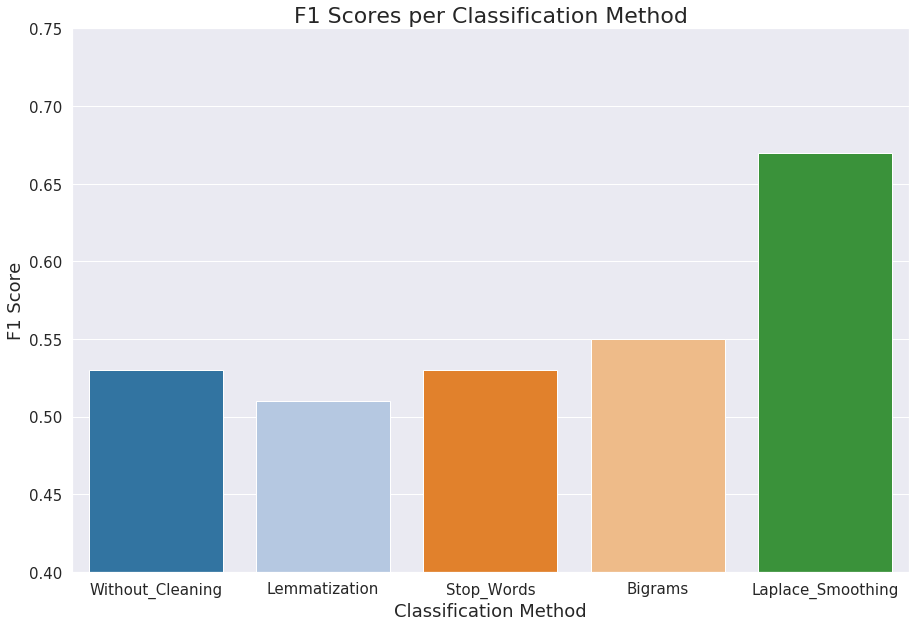

In [ ]:
"""
We represented the above information
with the form of bars.
"""

sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x='Method', y='F1', data=df, palette='tab20')\
                    .set_title('F1 Scores per Classification Method',fontsize=22)

plt.xticks(rotation=0)
plt.xlabel('Classification Method', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.ylim(0.4, 0.75)

(0.4, 0.75)

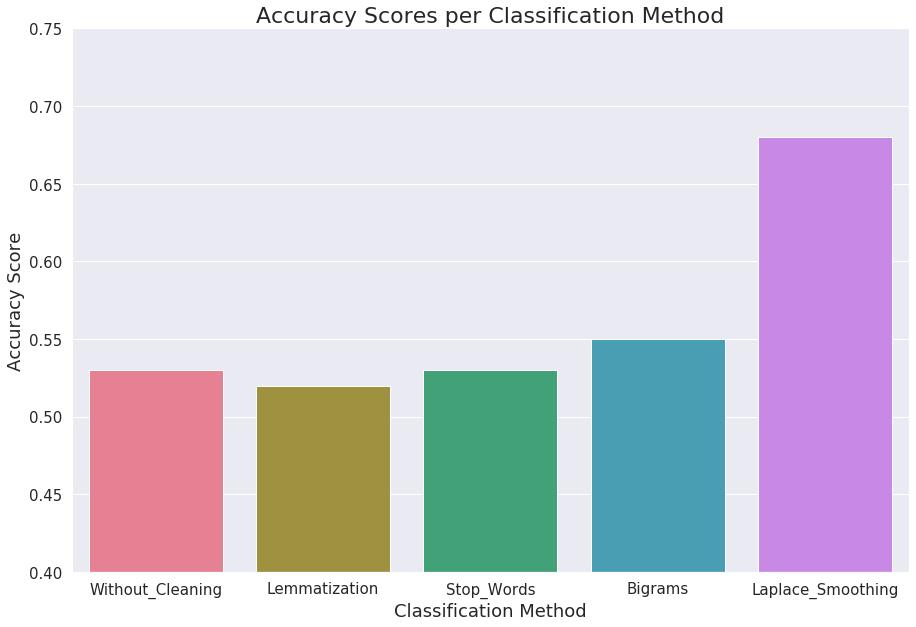

In [ ]:
"""
We represented the above information
with the form of bars.
"""

sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x='Method', y='Accuracy', data=df, palette='husl')\
                    .set_title('Accuracy Scores per Classification Method',fontsize=22)

plt.xticks(rotation=0)
plt.xlabel('Classification Method', fontsize=18)
plt.ylabel('Accuracy Score', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.ylim(0.4, 0.75)


##    <span style='color:Blue'>*Step 6:* </span> Summary

In general, in all the results the basic cleaning has been done according to pronunciation, ie conversion of all characters in lower case, removal of the punctuation marks, special characters, links and html tags.

According to the representation of the above results we observe:

- F1 Score is almost the same as Accuracy Score, with some exceptions in which Accuracy Score is slightly better (eg after Lemmatization and after using Laplace Smoothing)
- Naive Bayes has the worst performance (~ 0.51) after Lemmatization, because Comments contain a lot of slangs and innovations in general, and it is difficult (almost impossible) to recognize these words.
- Then we notice that after removing stopwords or the use of bigrams the algorithm did better with performances of ~ 0.53 and. 0.55 respectively.
- We also notice that whether we remove the stop-words or not, the score remains the same (~ 0.53). I think this happens mainly, because as I explain below the pronouns (you, your etc) play an important role in the comments (whether it will be offensive or not). Thus, stop-words can remove useless words like the, is, and etc but at the same time it removes words important for the correct prediction of the comment.
- Finally, we observe that the algorithm has the best performance of score 0.68 after the application of Laplace Smoothing. This is because we give alpha the value of 1. In essence, with this assignment of MultinomialNB, the probability of a word appearing will never be zero, unlike the simple Naive Bayes, which gives zero probability to words that appear rarely, spoiling the "gravity" of the comment. Therefore, Laplace Smoothing, gives the opportunity to words that appear more often to play a more important role and therefore to predict more comments correctly.

##  <span style='color:Purple'>*Now I will create a more complex feature table containing both Part-Of-Speech features and TF-IDF-based features*</span>

##    <span style='color:Blue'>*Step 1:* </span> Vectorization

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tr_df = pd.read_pickle("train_df.pkl")
ts_df = pd.read_pickle("test_df.pkl")

train = tr_df['Comment'].tolist()
test = ts_df['Comment'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidfX_train = tfidf_vectorizer.fit_transform(train)
tfidfX_test = tfidf_vectorizer.transform(test)

print("TF-IDF train shape:", tfidfX_train.shape)
print("TF-IDF test shape:", tfidfX_test.shape)

tfidfX_train_array = tfidfX_train.toarray()
tfidfX_test_array = tfidfX_test.toarray()

TF-IDF train shape: (3947, 1000)
TF-IDF test shape: (2235, 1000)


##    <span style='color:Blue'>*Step 2:* </span> Create a Merged Table from Part-of-Speech Based Features and TF-IDF Based Features

In this query, using the NTLK library, I find (for each comment) the number of nouns, verbs, adjectives and adverbs it has. After I find the percentage of the specific tags for each comment, then I add these 4 percentages in a list. After I have converted the tf-idf attributes to a list, then I put them all together in a list and convert it to np array. So if I print the new shape of the merged table, we will see that it changes from 1000 to 1004 (ie the 4 new features in each comment were successfully entered).

### α. Part-of-speech Tagger for train data

In [ ]:
import nltk

merged_list_train = []

for i, row in train_df.iterrows():
    
    list_of_pos_tags = []
    noun = 0.00
    verb = 0.00
    adverb = 0.00
    adjective = 0.00
    
    list_of_pos_tags = nltk.pos_tag(nltk.word_tokenize(train_df.loc[i,'Comment']))
    #Find the number of nouns,verbs,adverbs and adjectives of each comment
    for tpl in list_of_pos_tags:
        if tpl[1] == "NN" or tpl[1] == "NNS":
            noun = noun + 1
        if tpl[1] == "VB" or tpl[1] == "VBD" or tpl[1] == "VBG" or tpl[1] == "VBN" or tpl[1] == "VBP" or tpl[1] == "VBZ":
            verb = verb + 1
        if tpl[1] == "RB" or tpl[1] == "RBR" or tpl[1] == "RBS":
            adverb = adverb + 1
        if tpl[1] == "JJ" or tpl[1] == "JJR" or tpl[1] == "JJS":
            adjective = adjective + 1
    
    #Find the percentage of nouns,verbs,adverbs and adjectives of each comment
    if len(list_of_pos_tags) != 0:
        fractionAdverbs = adverb/len(list_of_pos_tags)
        fractionVerbs = verb/len(list_of_pos_tags)
        fractionAdjectives = adjective/len(list_of_pos_tags)
        fractionNouns = noun/len(list_of_pos_tags)
    
#     print(fractionNouns, fractionVerbs, fractionAdverbs, fractionAdjectives)
    
    temp = []
    #Concatenate the Part-of-Speech Based Features and TF-IDF Based Features in a list
    temp = tfidfX_train_array[i].tolist()
    temp.append(fractionNouns)
    temp.append(fractionVerbs)
    temp.append(fractionAdverbs)
    temp.append(fractionAdjectives)
    
    merged_list_train.append(temp)
    
#Convert the concatenated list to np array
merged_array_train = np.array(merged_list_train)
print("Shape of final merged train array:", merged_array_train.shape)

Shape of final merged train array: (3947, 1004)


### b. Part-of-speech Tagger for test data

In [ ]:
import nltk

merged_list_test = []

for i, row in test_df.iterrows():
    
    list_of_pos_tags = []
    noun = 0.00
    verb = 0.00
    adverb = 0.00
    adjective = 0.00
    
    list_of_pos_tags = nltk.pos_tag(nltk.word_tokenize(test_df.loc[i,'Comment']))
    #Find the number of nouns,verbs,adverbs and adjectives of each comment
    for tpl in list_of_pos_tags:
        if tpl[1] == "NN" or tpl[1] == "NNS":
            noun = noun + 1
        if tpl[1] == "VB" or tpl[1] == "VBD" or tpl[1] == "VBG" or tpl[1] == "VBN" or tpl[1] == "VBP" or tpl[1] == "VBZ":
            verb = verb + 1
        if tpl[1] == "RB" or tpl[1] == "RBR" or tpl[1] == "RBS":
            adverb = adverb + 1
        if tpl[1] == "JJ" or tpl[1] == "JJR" or tpl[1] == "JJS":
            adjective = adjective + 1
    
    #Find the percentage of nouns,verbs,adverbs and adjectives of each comment
    if len(list_of_pos_tags) != 0:
        fractionAdverbs = adverb/len(list_of_pos_tags)
        fractionVerbs = verb/len(list_of_pos_tags)
        fractionAdjectives = adjective/len(list_of_pos_tags)
        fractionNouns = noun/len(list_of_pos_tags)
    
#     print(fractionNouns, fractionVerbs, fractionAdverbs, fractionAdjectives)
    
    temp = []
    #Concatenate the Part-of-Speech Based Features and TF-IDF Based Features in a list
    temp = tfidfX_test_array[i].tolist()
    temp.append(fractionNouns)
    temp.append(fractionVerbs)
    temp.append(fractionAdverbs)
    temp.append(fractionAdjectives)
    
    merged_list_test.append(temp)

#Convert the concatenated list to np array
merged_array_test = np.array(merged_list_test)
print("Shape of final merged test array:", merged_array_test.shape)

Shape of final merged test array: (2235, 1004)


##   <span style='color:Blue'>*Step 3:* </span>  We test SVM and Random Decision Forest Classification Methods in the part-of-speech and TF-IDF feature table and evaluate them

### α. SVM

In [ ]:
from sklearn import svm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,make_scorer

gs_svc = svm.SVC(C=0.3,kernel='linear',probability=True)
gs_svc.fit(merged_array_train, label_train)
predictions = gs_svc.predict(merged_array_test)

#F1 
svm_tfidf_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Tfidf with SVM Classifier: ' , svm_tfidf_f1_test_score)

#Accuracy
svm_tfidf_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Tfidf with SVM Classifier: ' , svm_tfidf_acc_test_score)

F1 score of Tfidf with SVM Classifier:  0.61
Accuracy score of Tfidf with SVM Classifier:  0.65


### b. Random Decision Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

rf2 = RandomForestClassifier(n_estimators=100)
rf2.fit(merged_array_train, label_train)
predictions = rf2.predict(merged_array_test)

#F1
rf_tfidf_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Tfidf with Random-Forests Classifier:' , rf_tfidf_f1_test_score)


#Accuracy
rf_tfidf_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Tfidf with Random-Forests Classifier: ' , rf_tfidf_acc_test_score)

F1 score of Tfidf with Random-Forests Classifier: 0.60
Accuracy score of Tfidf with Random-Forests Classifier:  0.64


##  <span style='color:Purple'>*Now I will experiment with some methods to try to achieve the best possible results in the test set (Beat the Benchmark)*</span>

##    <span style='color:Blue'>*Step 1:* </span> Tokenization and Lemmanization 

In [ ]:
import nltk

# nltk.download('wordnet')

#Tokenization and Lemmanization in train data
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text)])

tr_df = pd.read_pickle("train_df.pkl")

tr_df['Comment'] = tr_df.Comment.apply(lemmatize_text).copy()

tr_df

,Insult,Date,Comment
0,1,20120618192155Z,you fuck your dad
1,0,20120528192215Z,i really dont understand your pointxa0 it seem...
2,0,NaN,axc2xa0majority of canadians can and have be w...
3,0,NaN,listen if you dont wanna get marry to a man or...
4,0,20120619094753Z,cxe1c bu1ea1n xuu1ed1ng u0111u01b0u1eddng biu1...
...,...,...,...
3942,1,20120502172717Z,you be both morons and that be never happen
3943,0,20120528164814Z,many toolbars include spell check like yahoo f...
3944,0,20120620142813Z,lambeauorwrigleyxa0xa0kmossxa0nsioux fall sd i...
3945,0,20120528205648Z,how about felix he be sure turn into one hell ...


In [ ]:
#Tokenization and Lemmanization in test data
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text)])

ts_df = pd.read_pickle("test_df.pkl")

ts_df['Comment'] = ts_df.Comment.apply(lemmatize_text).copy()

ts_df

,id,Insult,Date,Comment,Usage
0,1,0,20120603163526Z,like this if you be a tribe fan,PrivateTest
1,2,1,20120531215447Z,youre idiot,PrivateTest
2,3,1,20120823164228Z,i be a woman babs and the only war on women i ...,PrivateTest
3,4,1,20120826010752Z,wow you benefit so many win this year from his...,PrivateTest
4,5,1,20120602223825Z,haha green me red you now loser whos win now m...,PrivateTest
...,...,...,...,...,...
2230,2231,0,20120528100303Z,fuckin lame come on wtf stop fuck over my bity...,PrivateTest
2231,2232,1,20120531185813Z,you shut your ignorant pie hole you little ins...,PrivateTest
2232,2233,0,20120529130822Z,sweetie pie be look very much like her cousin ...,PrivateTest
2233,2234,1,20120531045826Z,ball4real where be you with your miami gayness,PrivateTest


##    <span style='color:Blue'>*Step 2:* </span> Vectorization

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

train = tr_df['Comment'].tolist()
test = ts_df['Comment'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=1700)
tfidfX_train = tfidf_vectorizer.fit_transform(train)
tfidfX_test = tfidf_vectorizer.transform(test)

print("TF-IDF train shape:", tfidfX_train.shape)
print("TF-IDF test shape:", tfidfX_test.shape)

tfidfX_train_array = tfidfX_train.toarray()
tfidfX_test_array = tfidfX_test.toarray()

TF-IDF train shape: (3947, 1700)
TF-IDF test shape: (2235, 1700)


##    <span style='color:Blue'>*Step 2:* </span> Create a Merged Table from Part-of-Speech Based Features and TF-IDF Based Features

*Here I decided to add to the number of verbs, nouns, adverbs and adjectives, the number of **pronouns**. This is because, as I studied the comments, I noticed that a comment is considered to be insult when it is addressed to a natural person, and not if it contains only offensive words. In short, a comment that contains swear words may not be offensive because it does not offend anyone.*


e.g.
- You are stupid. -> Insult
- This is stupid. -> NOT Insult

### α. Part-of-speech Tagger for train data

In [ ]:
import nltk

merged_list_train = []

for i, row in train_df.iterrows():
    
    list_of_pos_tags = []
    noun = 0.00
    verb = 0.00
    adverb = 0.00
    adjective = 0.00
    pronoun = 0.00
    
    list_of_pos_tags = nltk.pos_tag(nltk.word_tokenize(train_df.loc[i,'Comment']))
    #Find the number of nouns,verbs,adverbs and adjectives of each comment
    for tpl in list_of_pos_tags:
        if tpl[1] == "NN" or tpl[1] == "NNS":
            noun = noun + 1
        if tpl[1] == "VB" or tpl[1] == "VBD" or tpl[1] == "VBG" or tpl[1] == "VBN" or tpl[1] == "VBP" or tpl[1] == "VBZ":
            verb = verb + 1
        if tpl[1] == "RB" or tpl[1] == "RBR" or tpl[1] == "RBS":
            adverb = adverb + 1
        if tpl[1] == "JJ" or tpl[1] == "JJR" or tpl[1] == "JJS":
            adjective = adjective + 1
        if tpl[1] == "PRP" or tpl[1] == "PRP$" or tpl[1] == "JJS":
            pronoun = pronoun + 1
    
    #Find the percentage of nouns,verbs,adverbs and adjectives of each comment
    if len(list_of_pos_tags) != 0:
        fractionAdverbs = adverb/len(list_of_pos_tags)
        fractionVerbs = verb/len(list_of_pos_tags)
        fractionAdjectives = adjective/len(list_of_pos_tags)
        fractionNouns = noun/len(list_of_pos_tags)
        fractionPronouns = pronoun/len(list_of_pos_tags)
    
#     print(fractionNouns, fractionVerbs, fractionAdverbs, fractionAdjectives)
    
    temp = []
    #Concatenate the Part-of-Speech Based Features and TF-IDF Based Features in a list
    temp = tfidfX_train_array[i].tolist()
    temp.append(noun)
    temp.append(verb)
    temp.append(adverb)
    temp.append(adjective)
    temp.append(pronoun)
    
    merged_list_train.append(temp)
    
#Convert the concatenated list to np array
merged_array_train = np.array(merged_list_train)
print("Shape of final merged train array:", merged_array_train.shape)

Shape of final merged train array: (3947, 1705)


### b. Part-of-speech Tagger for test data

In [ ]:
import nltk

merged_list_test = []

for i, row in test_df.iterrows():
    
    list_of_pos_tags = []
    noun = 0.00
    verb = 0.00
    adverb = 0.00
    adjective = 0.00
    pronoun = 0.00
    
    list_of_pos_tags = nltk.pos_tag(nltk.word_tokenize(test_df.loc[i,'Comment']))
    #Find the number of nouns,verbs,adverbs and adjectives of each comment
    for tpl in list_of_pos_tags:
        if tpl[1] == "NN" or tpl[1] == "NNS":
            noun = noun + 1
        if tpl[1] == "VB" or tpl[1] == "VBD" or tpl[1] == "VBG" or tpl[1] == "VBN" or tpl[1] == "VBP" or tpl[1] == "VBZ":
            verb = verb + 1
        if tpl[1] == "RB" or tpl[1] == "RBR" or tpl[1] == "RBS":
            adverb = adverb + 1
        if tpl[1] == "JJ" or tpl[1] == "JJR" or tpl[1] == "JJS":
            adjective = adjective + 1
        if tpl[1] == "PRP" or tpl[1] == "PRP$" or tpl[1] == "JJS":
            pronoun = pronoun + 1
    
    #Find the percentage of nouns,verbs,adverbs and adjectives of each comment
    if len(list_of_pos_tags) != 0:
        fractionAdverbs = adverb/len(list_of_pos_tags)
        fractionVerbs = verb/len(list_of_pos_tags)
        fractionAdjectives = adjective/len(list_of_pos_tags)
        fractionNouns = noun/len(list_of_pos_tags)
        fractionPronouns = pronoun/len(list_of_pos_tags)
    
#     print(fractionNouns, fractionVerbs, fractionAdverbs, fractionAdjectives)
    
    temp = []
    #Concatenate the Part-of-Speech Based Features and TF-IDF Based Features in a list
    temp = tfidfX_test_array[i].tolist()
    temp.append(noun)
    temp.append(verb)
    temp.append(adverb)
    temp.append(adjective)
    temp.append(pronoun)
    
    merged_list_test.append(temp)

#Convert the concatenated list to np array
merged_array_test = np.array(merged_list_test)
print("Shape of final merged test array:", merged_array_test.shape)

Shape of final merged test array: (2235, 1705)


##    <span style='color:Blue'>*Step 3:* </span>  Try different Classification Methods and evaluate them

*Here I decided to use SVM with different parameters and Logistic Regression to see if it will give me better results.*

In [ ]:
from sklearn import svm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,make_scorer
from sklearn import linear_model

gs_svc = svm.SVC(kernel='rbf',C=1759,gamma=0.001)
gs_svc.fit(merged_array_train, label_train)
predictions = gs_svc.predict(merged_array_test)

#F1 
svm1_tfidf_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Tfidf with SVM Classifier: ' , svm1_tfidf_f1_test_score)

#Accuracy
svm1_tfidf_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Tfidf with SVM Classifier: ' , svm1_tfidf_acc_test_score)

F1 score of Tfidf with SVM Classifier:  0.70
Accuracy score of Tfidf with SVM Classifier:  0.71


In [ ]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=8, max_iter=1700)
logreg.fit(merged_array_train, label_train)
predictions = logreg.predict(merged_array_test)

#F1 
lg_tfidf_f1_test_score = "{:.2f}".format(f1_score(label_test,predictions,average='weighted'))
print('F1 score of Tfidf with Logistic Regression Classifier: ' , lg_tfidf_f1_test_score)

#Accuracy
lg_tfidf_acc_test_score = "{:.2f}".format(accuracy_score(label_test,predictions))
print('Accuracy score of Tfidf with Logistic Regression Classifier: ' , lg_tfidf_acc_test_score)

F1 score of Tfidf with Logistic Regression Classifier:  0.69
Accuracy score of Tfidf with Logistic Regression Classifier:  0.70


##   <span style='color:Blue'>*Step 4:* </span>   Summary of results

In [ ]:
all_f1 = []
all_accuracy = []

all_f1.append(nb_bow_f1_test_score_0)
all_f1.append(nb_bow_f1_test_score_4)
all_f1.append(svm_tfidf_f1_test_score)
all_f1.append(rf_tfidf_f1_test_score)
all_f1.append(svm1_tfidf_f1_test_score)
all_f1.append(lg_tfidf_f1_test_score)

all_accuracy.append(nb_bow_acc_test_score_0)
all_accuracy.append(nb_bow_acc_test_score_4)
all_accuracy.append(svm_tfidf_acc_test_score)
all_accuracy.append(rf_tfidf_acc_test_score)
all_accuracy.append(svm1_tfidf_acc_test_score)
all_accuracy.append(lg_tfidf_acc_test_score)

data = {'Method': ['NaiveBayes', 'NB_Laplace', 'SVM_1', 'RandomForest', 'SVM_2', 'LogisticRegression'],
            'F1': all_f1,
            'Accuracy': all_accuracy
           }
df = pd.DataFrame(data, columns = ['Method', 'F1', 'Accuracy'])
df

,Method,F1,Accuracy
0,NaiveBayes,0.53,0.53
1,NB_Laplace,0.67,0.68
2,SVM_1,0.61,0.65
3,RandomForest,0.60,0.64
4,SVM_2,0.70,0.71
5,LogisticRegression,0.69,0.70


- Naive Bayes: The initial evaluation with the basic preprocessing
- NB_Laplace: Naive Bayes after Laplace Smoothing (because he had the best score)
- SVM_1: SVM using tf-idf and pos-tags
- RandomForest: RandomForest using merged tf-idf table and pos-tags
- SVM_2: SVM using merged array tf-idf and pos-tags after Lemmanization and adding pronouns
- LogisticRegression: LogisticRegression using the merged tf-idf table and pos-tags after Lemmanization and addition of pronouns)

(0.5, 0.75)

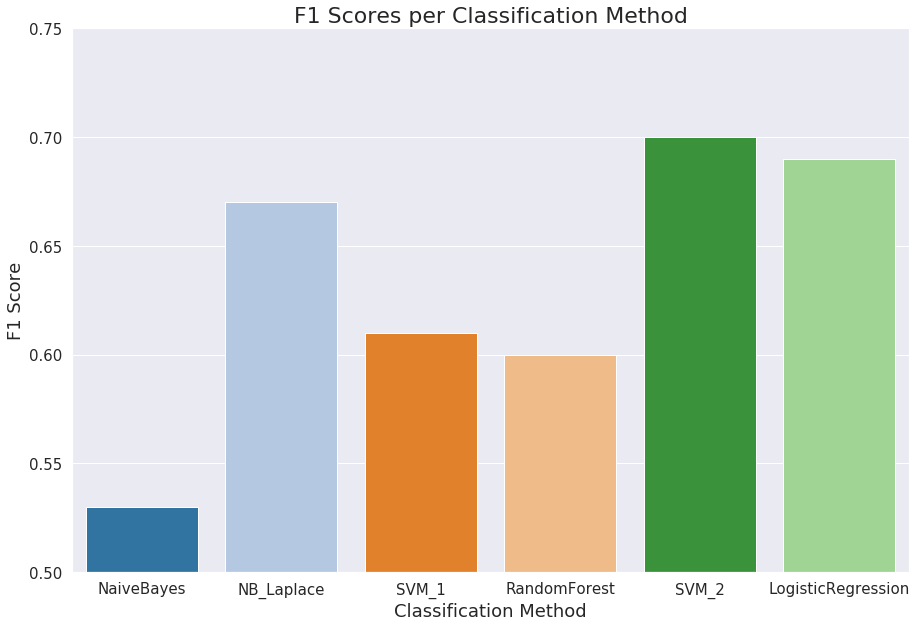

In [ ]:
"""
We represented the above information
in the form of bars.
"""

sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x='Method', y='F1', data=df, palette='tab20')\
                    .set_title('F1 Scores per Classification Method',fontsize=22)

plt.xticks(rotation=0)
plt.xlabel('Classification Method', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.ylim(0.5, 0.75)


(0.5, 0.75)

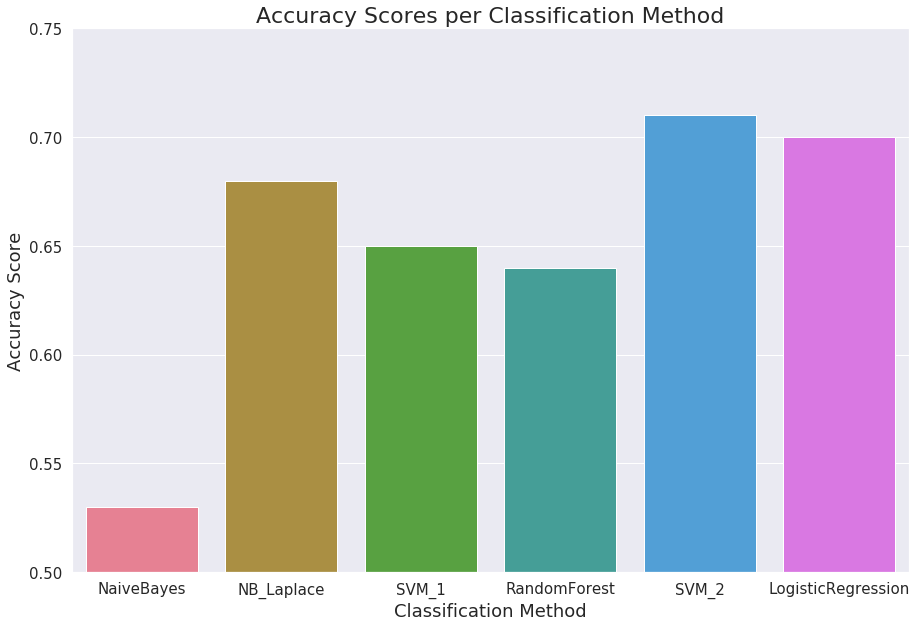

In [ ]:
"""
We represented the above information
in the form of bars.
"""

sns.set(rc={'figure.figsize':(15,10)})
ax = sns.barplot(x='Method', y='Accuracy', data=df, palette='husl')\
                    .set_title('Accuracy Scores per Classification Method',fontsize=22)

plt.xticks(rotation=0)
plt.xlabel('Classification Method', fontsize=18)
plt.ylabel('Accuracy Score', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.ylim(0.5, 0.75)

##    <span style='color:Blue'>*Step 5:* </span>   Summaries

According to the above representation of the results we observe that:

- The classification method Naive Bayes without any optimization and/or data cleaning had the worst score than all (~ 0.53).
- Using the merged tf-idf table and pos-tags, the SVM method achieved an Accuracy score of ~ 0.65 and did better than the Random Forest method, which in the same data reached a score of ~ 0.60.
- After the optimization with Lemmatization and the addition of pronouns in the pos tags, we notice a large deviation to the score of SVM (~ 0.71). This happens mainly because the appropriate lemmatization was done in the data, but the addition of personal pronouns also played an important role, because as pointed out above, insult is not considered a comment that contains simply offensive words but when it is addressed to someone offensively. I also experimented a lot with the parameters using GridSearchCV to find those features that will give me the best possible result.
- I decided to try another method Logistic Regression to see if it will give me better results, but it did not manage to surpass the SVM scores.
- The best performance had SVM and Logistic Regression after the optimization I did in general.
- I tried other methods and features, but none of them exceeded the performance of SVM, so I did not list them in the final notebook.
- In general, although SVM was slower than all the methods during its execution and required more time, it always had the best performance compared to the other methods, as seen in the diagramms.
- I also tried different data preprocessing and different classification methods, but the performance of the algorithms did not differ much from before when there I did no do some "serious" data preprocessing. In short, no matter how much optimization I did, the score did not increase by more than 0.05%. This is because our data is quite difficult for algorithms, as they contain many slangs, innovations and words that do not have any meaning (eg bitcizzz, azzhole, f@k! Etc). For this reason, no matter how well the data was pre-processed, it was never enough for an algorithm to recognize these cases.
- It is worth metioning that the Naive Bayes method with Laplace Smoothing (with BoW vectorization) came quite close to the final optimization done with SVM (with tf-idf vectorization)
